In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('Advertising.csv',index_col=False)

In [8]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [9]:
df.drop(columns=['Unnamed: 0'],axis=0, inplace=True)

In [10]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [12]:
df.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [15]:
x= df.drop(columns=['Sales'],axis=0)
y=df['Sales']

In [16]:
x

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [17]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=43)

<Axes: >

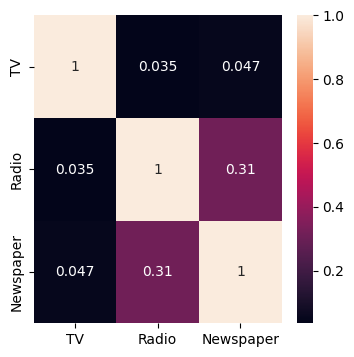

In [23]:
plt.figure(figsize=(4,4))
sns.heatmap(x_train.corr(),annot=True)

In [29]:
# Model Training 
from sklearn.tree import DecisionTreeRegressor
DTR = DecisionTreeRegressor()

In [31]:
DTR.fit(x_train,y_train)
y_pred = DTR.predict(x_test)

In [33]:
from sklearn.metrics import mean_absolute_error,r2_score,root_mean_squared_error,mean_squared_error

score = mean_squared_error(y_test,y_pred)
print("MSE: ", score)
cm1 = r2_score(y_test,y_pred)
print("R2 SCORE: ",cm1)
cm2 = mean_absolute_error(y_pred,y_test)
print("MAE: " ,cm2)
print("RMSE: ",root_mean_squared_error(y_test,y_pred))

MSE:  0.6934999999999997
R2 SCORE:  0.9759084067849013
MAE:  0.6449999999999998
RMSE:  0.832766473868875
